In [4]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
import matplotlib.pyplot as plt

In [5]:
stock_symbol = 'AAPL'

## Initial stock data fetching and plotting

[*********************100%%**********************]  1 of 1 completed


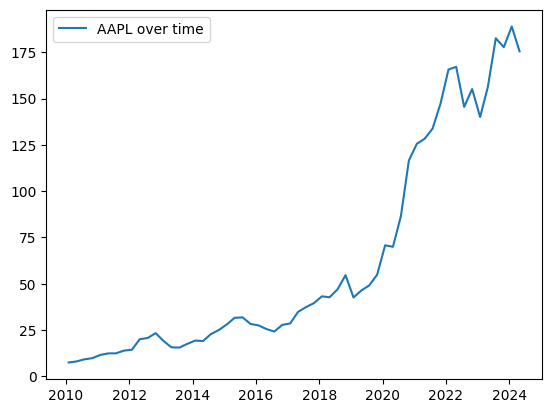

In [6]:
stock_data = (yf.download(stock_symbol, start="2010-01-01", end=pd.Timestamp.now())).resample('3M').mean()['Open']
plt.plot(stock_data.index, stock_data.values, label = f"{stock_symbol} over time")
plt.legend()
plt.show()

## Autocorrelation plot

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stock_data.Open)

AttributeError: 'Series' object has no attribute 'Open'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(stock_data['Open'], order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                   58
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.307
Date:                Wed, 01 May 2024   AIC                            406.615
Time:                        13:20:19   BIC                            418.873
Sample:                    01-31-2010   HQIC                           411.379
                         - 04-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2265      0.103      2.204      0.028       0.025       0.428
ar.L2          0.0194      0.084      0.232      0.817      -0.144       0.183
ar.L3          0.1225      0.102      1.197      0.231      -0.078       0.323
ar.L4         -0.2800      0.108     -2.581      0.010      -0.493      -0.067
ar.L5          0.4994      0.136      3.676      0.000       0.233       0.766
sigma2        57.6595      7.649      7.538      0.000      42.668      72.651
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                22.02
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              23.30   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

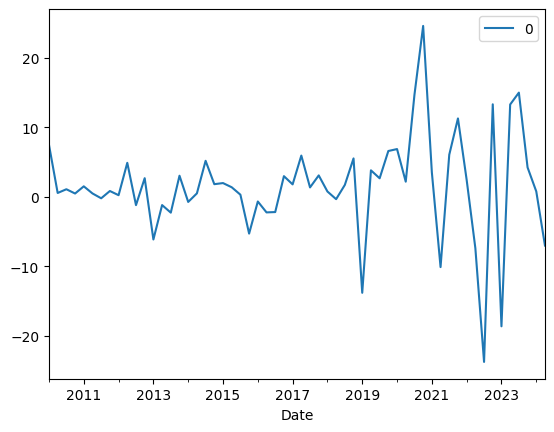

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

,0
count,58.000000
mean,1.471217
std,7.513998
min,-23.782292
25%,-0.595754
50%,1.437182
75%,4.120510
max,24.604162


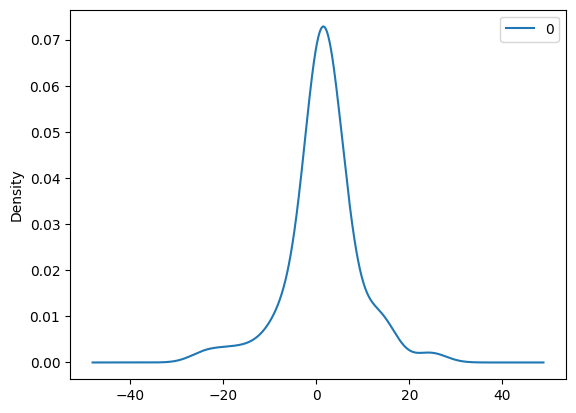

In [ ]:
residuals.plot(kind='kde')
residuals.describe()